In [45]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- File Loading in VS Code (instead of google.colab.files.upload()) ---
# Replace 'your_data_file.csv' with the actual name of your file.
# Make sure the file is in the same directory as your .ipynb file,
# or provide the full path to the file.
try:
    df = pd.read_csv('AirfoilSelfNoise.csv')
    print("File loaded successfully!")
    print(df.head()) # Display the first few rows to confirm
except FileNotFoundError:
    print("Error: 'AirfoilSelfNoise.csv' not found.")
    print("Please make sure the file is in the correct directory or update the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

# --- Your subsequent data analysis and visualization code will go here ---
# For example:
# df.describe()
# sns.histplot(df['some_column'])
# plt.show()

File loaded successfully!
      f  alpha       c  U_infinity     delta     SSPL
0   800    0.0  0.3048        71.3  0.002663  126.201
1  1000    0.0  0.3048        71.3  0.002663  125.201
2  1250    0.0  0.3048        71.3  0.002663  125.951
3  1600    0.0  0.3048        71.3  0.002663  127.591
4  2000    0.0  0.3048        71.3  0.002663  127.461


In [46]:
# Load dataset
df = pd.read_csv("AirfoilSelfNoise.csv")  # Ganti sesuai nama file jika berbeda

# 🧾 1. Penjelasan Variabel
# f           = Frekuensi suara (Hz)
# alpha       = Sudut serang airfoil (derajat)
# c           = Ukuran chord airfoil (meter)
# U_infinity  = Kecepatan udara bebas (m/s)
# delta       = Ketebalan lapisan viskos (meter)
# SSPL        = Sound Pressure Level (target yang ingin diprediksi)

# 🧾 2. Tujuan Prediksi
#Model prediksi ini bertujuan untuk:

#Memperkirakan tingkat kebisingan (SSPL) berdasarkan berbagai faktor aerodinamika.

#Ini sangat penting untuk:

#a.Mendesain airfoil yang lebih senyap

#b.Mengurangi polusi suara dari pesawat

#c.Simulasi desain aerodinamika pada drone, turbin angin, atau kendaraan lain

# Tampilkan info awal
print("Jumlah data:", df.shape)
print("\nNama kolom:", df.columns.tolist())
df.head()


Jumlah data: (1503, 6)

Nama kolom: ['f', 'alpha', 'c', 'U_infinity', 'delta', 'SSPL']


,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [47]:
# Statistik ringkasan
df.describe()

# Cek missing value
print("\nMissing value per kolom:\n", df.isnull().sum())



Missing value per kolom:
 f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64


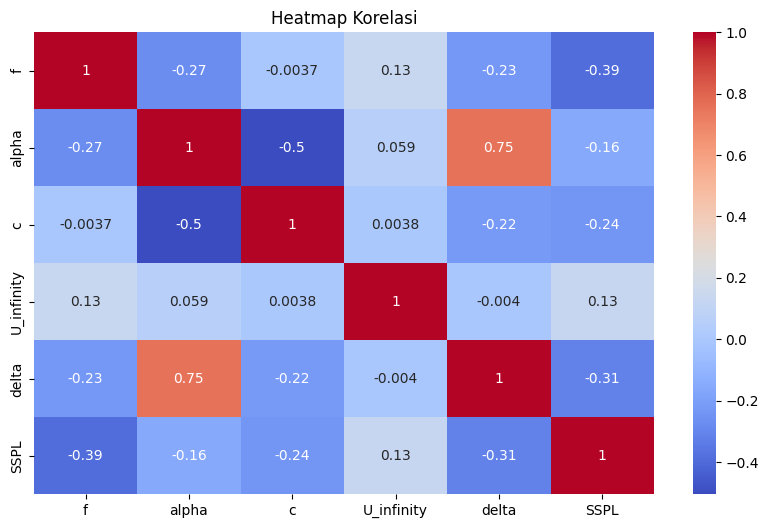

In [48]:
# 1. Korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

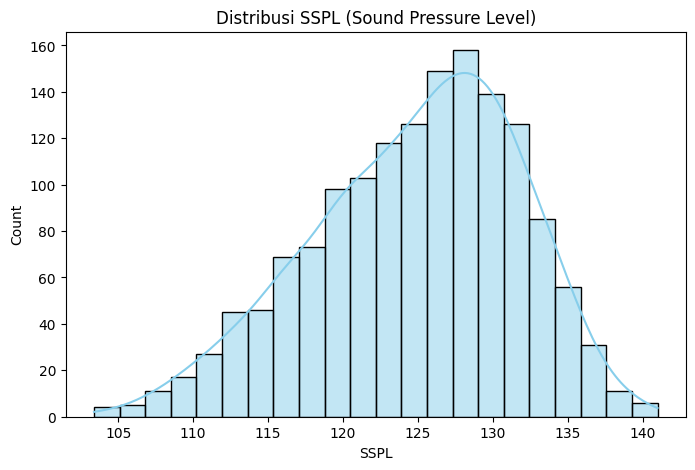

In [49]:
# 2. Histogram distribusi target (SSPL)
plt.figure(figsize=(8, 5))
sns.histplot(df['SSPL'], kde=True, color='skyblue')
plt.title("Distribusi SSPL (Sound Pressure Level)")
plt.xlabel("SSPL")
plt.show()

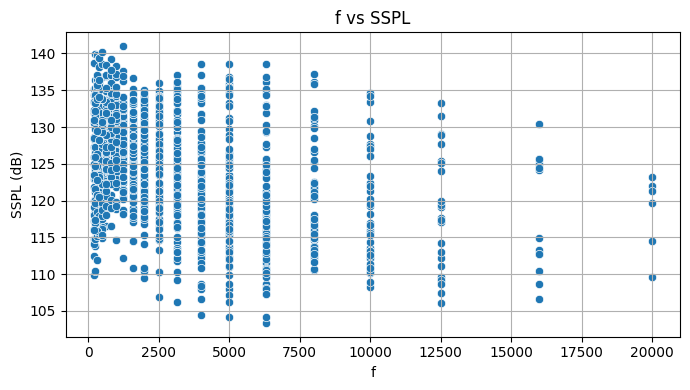

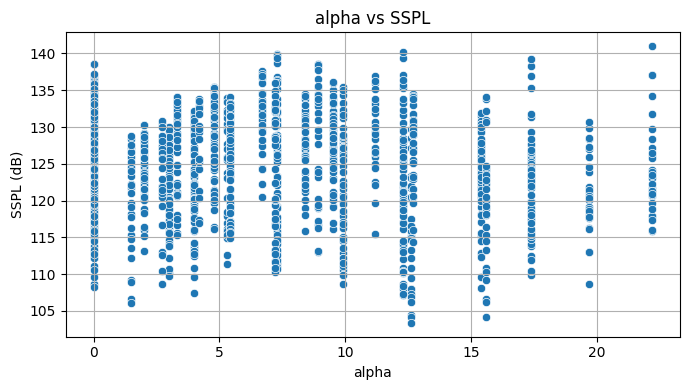

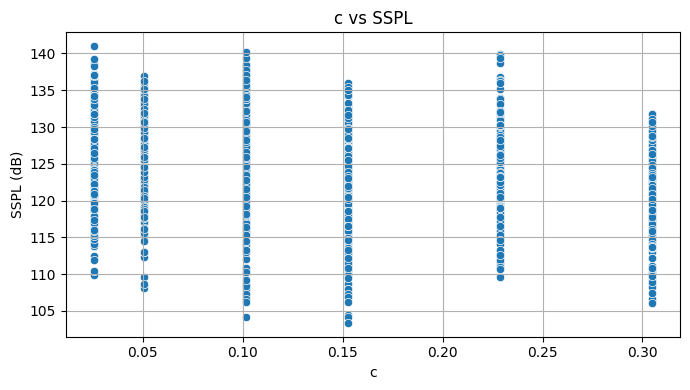

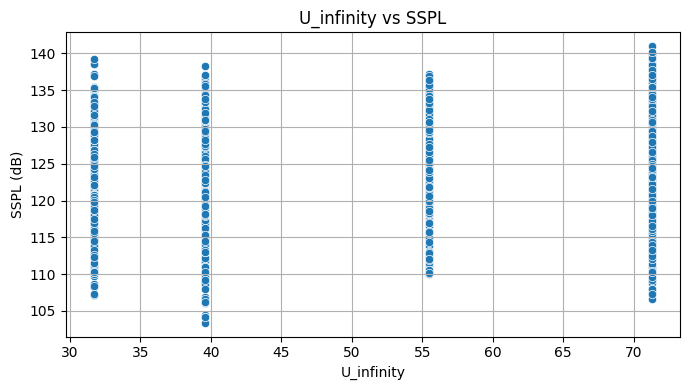

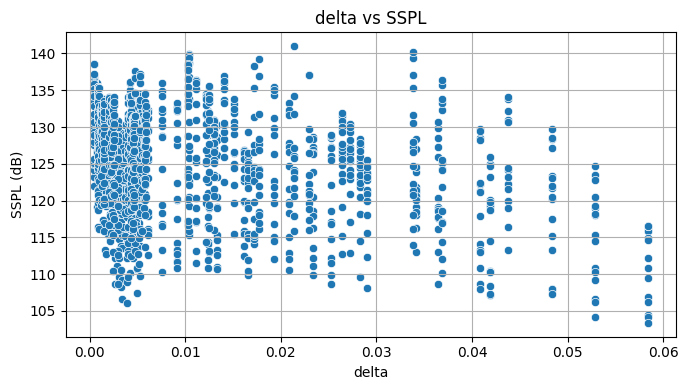

In [50]:
# 3. Scatter plot: Frekuensi vs SSPL
import matplotlib.pyplot as plt
import seaborn as sns

features = ['f', 'alpha', 'c', 'U_infinity', 'delta']

# Buat plot untuk setiap fitur
for feature in features:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(x=df[feature], y=df['SSPL'])
    plt.title(f"{feature} vs SSPL")
    plt.xlabel(feature)
    plt.ylabel("SSPL (dB)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [51]:
#Regresi Linier Sederhana (Semua fitur → SSPL)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Daftar fitur yang akan diuji
features = ['f', 'alpha', 'c', 'U_infinity', 'delta']
y = df['SSPL']

# Loop untuk setiap fitur
for feature in features:
    print(f"\n📈 Regresi Linier Sederhana ({feature} → SSPL)")

    X = df[[feature]]  # Data harus dalam bentuk 2D
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE  : {mae:.3f}")
    print(f"MSE  : {mse:.3f}")
    print(f"RMSE : {rmse:.3f}")
    print(f"R²   : {r2:.3f}")



📈 Regresi Linier Sederhana (f → SSPL)
MAE  : 5.411
MSE  : 45.347
RMSE : 6.734
R²   : 0.095

📈 Regresi Linier Sederhana (alpha → SSPL)
MAE  : 5.638
MSE  : 47.732
RMSE : 6.909
R²   : 0.047

📈 Regresi Linier Sederhana (c → SSPL)
MAE  : 5.705
MSE  : 47.827
RMSE : 6.916
R²   : 0.045

📈 Regresi Linier Sederhana (U_infinity → SSPL)
MAE  : 5.716
MSE  : 49.150
RMSE : 7.011
R²   : 0.019

📈 Regresi Linier Sederhana (delta → SSPL)
MAE  : 5.341
MSE  : 42.048
RMSE : 6.484
R²   : 0.161


In [52]:
#Regresi Linier Berganda (Semua fitur → SSPL)
# Semua fitur kecuali SSPL
X_multi = df.drop(columns=['SSPL'])
y = df['SSPL']

# Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Model & training
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

# Prediksi
y_pred_multi = model_multi.predict(X_test_m)

# Evaluasi
mse_m = mean_squared_error(y_test_m, y_pred_multi)
rmse_m = np.sqrt(mse_m)
mae_m = mean_absolute_error(y_test_m, y_pred_multi)
r2_m = r2_score(y_test_m, y_pred_multi)

print("\nRegresi Linier Berganda (Semua fitur → SSPL)")
print(f"MAE  : {mae_m:.3f}")
print(f"MSE  : {mse_m:.3f}")
print(f"RMSE : {rmse_m:.3f}")
print(f"R²   : {r2_m:.3f}")



Regresi Linier Berganda (Semua fitur → SSPL)
MAE  : 3.672
MSE  : 22.129
RMSE : 4.704
R²   : 0.558


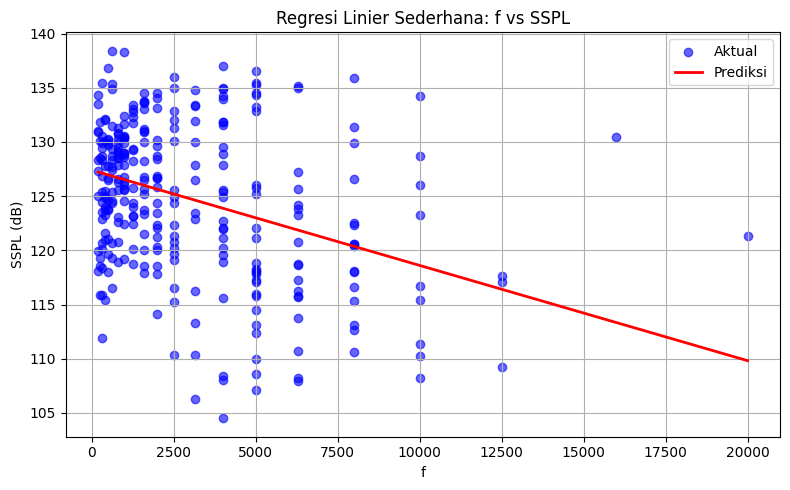

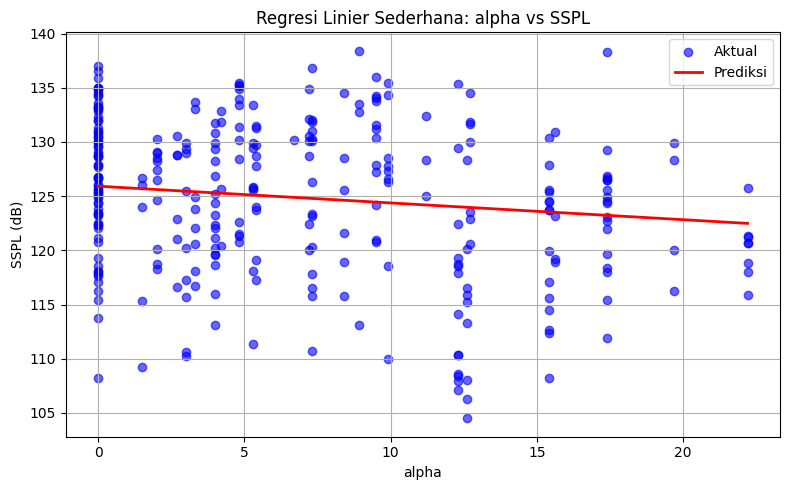

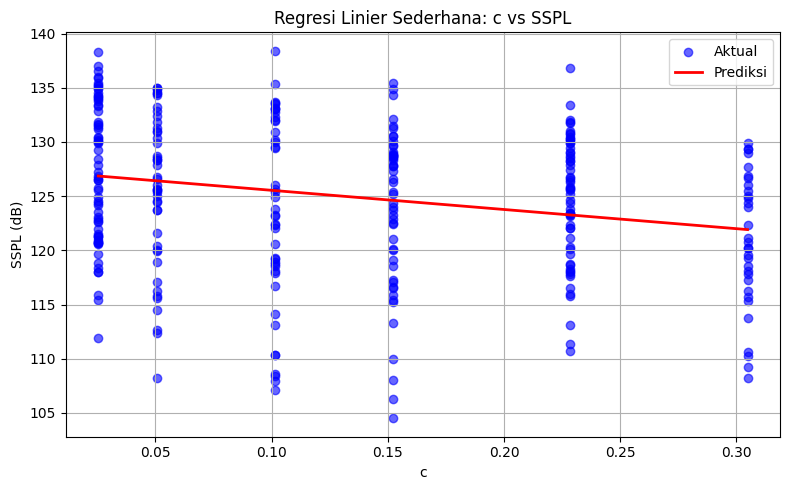

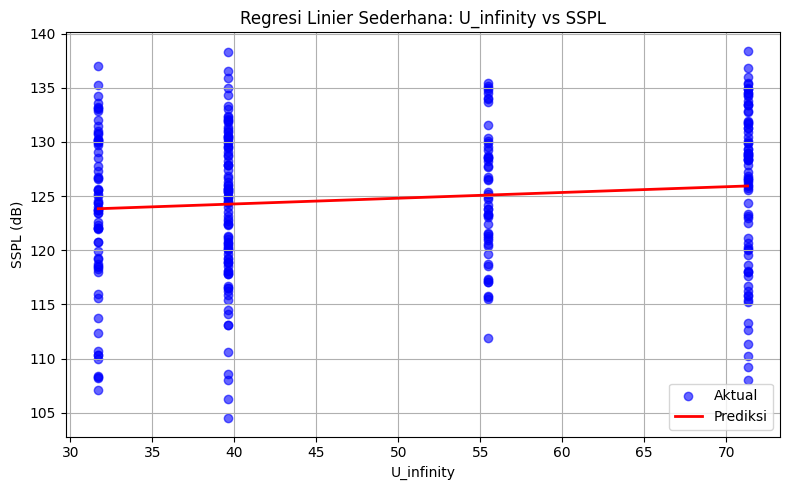

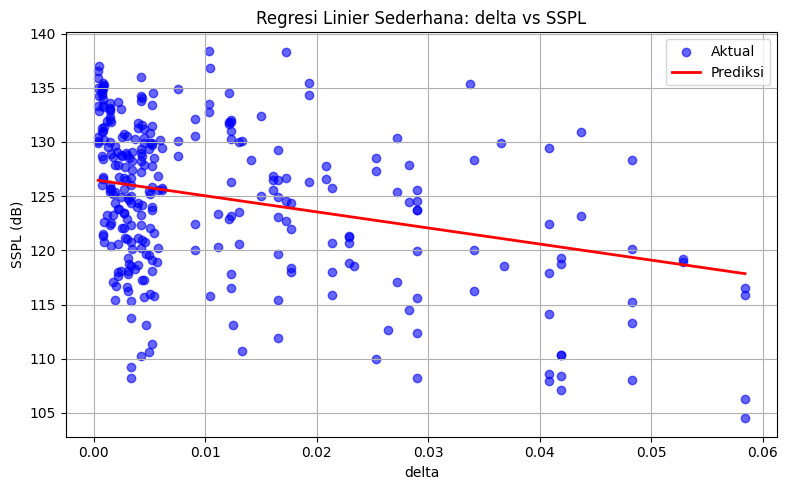

In [53]:
#Visualisasi Regresi Linier Sederhana untuk Semua Fitur
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

features = ['f', 'alpha', 'c', 'U_infinity', 'delta']
y = df['SSPL']

for feature in features:
    X = df[[feature]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Sort X_test dan y_pred agar garis regresi mulus
    sorted_idx = X_test[feature].argsort()
    X_test_sorted = X_test.iloc[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]

    plt.figure(figsize=(8, 5))
    plt.scatter(X_test, y_test, color='blue', label='Aktual', alpha=0.6)
    plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Prediksi')
    plt.xlabel(feature)
    plt.ylabel('SSPL (dB)')
    plt.title(f'Regresi Linier Sederhana: {feature} vs SSPL')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


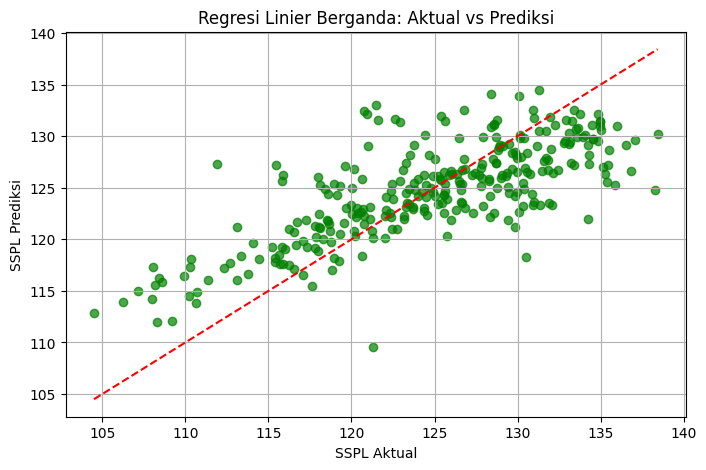

In [54]:
#Visualisasi Regresi Linier Berganda Aktual vs Prediksi
plt.figure(figsize=(8, 5))
plt.scatter(y_test_m, y_pred_multi, alpha=0.7, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--')  # garis ideal
plt.xlabel('SSPL Aktual')
plt.ylabel('SSPL Prediksi')
plt.title('Regresi Linier Berganda: Aktual vs Prediksi')
plt.grid(True)
plt.show()


In [55]:
#Evaluasi Regresi Linier Sederhana (Semua fitur→ SSPL)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib # Pastikan joblib sudah diimpor

features = ['f', 'alpha', 'c', 'U_infinity', 'delta']
y = df['SSPL']

for feature in features:
    X = df[[feature]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n📊 Evaluasi Regresi Linier Sederhana ({feature} → SSPL)")
    print(f"MAE  : {mae:.4f}") # Rata-rata error absolut
    print(f"MSE  : {mse:.4f}") # Rata-rata error kuadrat
    print(f"RMSE : {rmse:.4f}") # Akar dari MSE, dalam satuan yang sama dengan target
    print(f"R²   : {r2:.4f}") # Seberapa besar variasi target yang bisa dijelaskan model



📊 Evaluasi Regresi Linier Sederhana (f → SSPL)
MAE  : 5.4105
MSE  : 45.3470
RMSE : 6.7340
R²   : 0.0948

📊 Evaluasi Regresi Linier Sederhana (alpha → SSPL)
MAE  : 5.6380
MSE  : 47.7321
RMSE : 6.9088
R²   : 0.0472

📊 Evaluasi Regresi Linier Sederhana (c → SSPL)
MAE  : 5.7053
MSE  : 47.8269
RMSE : 6.9157
R²   : 0.0453

📊 Evaluasi Regresi Linier Sederhana (U_infinity → SSPL)
MAE  : 5.7155
MSE  : 49.1501
RMSE : 7.0107
R²   : 0.0189

📊 Evaluasi Regresi Linier Sederhana (delta → SSPL)
MAE  : 5.3406
MSE  : 42.0476
RMSE : 6.4844
R²   : 0.1607


In [56]:
print("\n📊 Evaluasi Regresi Linier Berganda (Semua fitur → SSPL)")
print(f"MAE  : {mae_m:.4f}") # Rata-rata error absolut
print(f"MSE  : {mse_m:.4f}") # Rata-rata error kuadrat
print(f"RMSE : {rmse_m:.4f}") # Akar dari MSE, dalam satuan yang sama dengan target
print(f"R²   : {r2_m:.4f}") # Seberapa besar variasi target yang bisa dijelaskan model

# --- Tambahan untuk menyimpan model ---
# Simpan model yang sudah dilatih ke file .pkl
# Pastikan nama file ini ('linear_regression_model.pkl') sama persis dengan yang dimuat di dashboard Streamlit Anda
joblib.dump(model_multi, 'linear_regression_model.pkl')
print("\nModel berhasil disimpan sebagai 'linear_regression_model.pkl'")


📊 Evaluasi Regresi Linier Berganda (Semua fitur → SSPL)
MAE  : 3.6724
MSE  : 22.1286
RMSE : 4.7041
R²   : 0.5583

Model berhasil disimpan sebagai 'linear_regression_model.pkl'
